# Lecture 8 Problem Sheet

## Q1: By hand calculations of sums of squares specifically for **TWO-WAY ANOVA**

These equations would have to be given as they're not easily memorable...

> $C_{f} = \dfrac{y_{...}^{2}}{abn}$

> $SS_{T} = \sum \sum \sum y_{ijk}^{2} - C_{f}$

> $SS_{A} = \dfrac{1}{bn} \sum^{a}_{i=1}y_{i..}^{2} - C_{f}$

> $SS_{B} = \dfrac{1}{an} \sum^{b}_{j=1}y_{.j.}^{2} - C_{f}$

$SS_{AB}$ is tricky to calculate, requires two stages:

> $1) SS_{Subtotals} = \dfrac{1}{n} \sum^{a}_{i=1} \sum^{b}_{j=1} y_{ij.}^{2} - C_{f}$

> $2) SS_{AB} = SS_{Subtotals} - SS_{A} - SS_{B}$

And you get the sum of squared residuals by taking the three RHS terms from the total, **or by taking the subtotals from the total**!

In [1]:
battery.life <- c(130, 155, 74, 180, 150, 188, 159, 126,
                  138, 110, 168, 160, 34, 40, 80, 75, 136,
                  122, 106, 115, 174, 120, 150, 139,
                  20, 70, 82, 58, 25, 70, 58, 45, 96, 104, 82, 60)

In [2]:
temp <- factor(c(rep(1,12),rep(2,12),rep(3,12)))

material <- factor(c( rep(rep(1:3, rep(4,3)),3) ))

battery <- data.frame(battery.life, temp, material)

In [3]:
# cleaning up
rm(battery.life, temp, material)
attach(battery)

In [4]:
# question inputs
a <- 3
b <- 3
n <- 4

y... <- sum(battery.life)

squared.y.ijk <- sum(battery.life**2)

In [5]:
C.f <- y...**2 / (a*b*n)
C.f

[1] 400900

## $SS_{T}$

In [6]:
SS.T <- squared.y.ijk - C.f
SS.T

[1] 77646.97

## $SS_{A}$

> $SS_{A} = \dfrac{1}{bn} \sum^{a}_{i=1}y_{i..}^{2} - C_{f}$


In [7]:
SS.A <- (sum(by(battery.life, material, sum)**2) / (b*n)) - C.f

SS.A

[1] 10683.72

## $SS_{B}$

> $SS_{B} = \dfrac{1}{an} \sum^{b}_{j=1}y_{.j.}^{2} - C_{f}$


In [8]:
SS.B <- (sum(by(battery.life, temp, sum)**2) / (a*n)) - C.f

SS.B

[1] 39118.72

## $SS_{Subtotals}$

> $SS_{Subtotals} = \dfrac{1}{n} \sum^{a}_{i=1} \sum^{b}_{j=1} y_{ij.}^{2} - C_{f}$

In [9]:
SS.st <- (sum(by(battery.life, list(material,temp), sum)**2) / n) - C.f

SS.st

[1] 59416.22

## $SS_{AB}$

> $SS_{AB} = SS_{Subtotals} - SS_{A} - SS_{B}$

In [10]:
SS.AB <- SS.st - SS.A - SS.B
SS.AB

[1] 9613.778

## $SS_{R}$

In [11]:
SS.R <- SS.T - SS.A - SS.B - SS.AB
SS.R

[1] 18230.75

---

&nbsp;

&nbsp;

## Q2) Two-way ANOVA

Two-factor model with interaction terms:
> $y_{ijk} = \mu + \tau_{i} + \beta_{j} + \left ( \tau\beta \right )_{ij} + \epsilon_{ijk}$,

where $i = 1,2,3$ and $j = 1,2,3,4$ and $k=1,2,3$.

We may also look into fitting a two-factor model without interaction terms, which looks like:
> $y_{ijk} = \mu + \tau_{i} + \beta_{j} + \epsilon_{ijk}$.

---

* Horticultural products, testing new fertiliser.

* Two factors: **Sodium** and **Calcium**


* Sodium = Factor A
    * Number of levels within Factor A group = $a = 3$
    * Treatment **effect** for sodium factor: $\tau_{i}$


* Calcium = Factor B
    * Number of levels within Factor B group = $b = 4$
    * Treatment **effect** for calcium factor: $\beta_{j}$.
    
    
* Interaction between Calcium and Sodium is factor AB
    * Number of levels = number of cells (each with $n = 3$ replicates) = $ab = 12$
    * Treatment **effect** for the interation is given by $\left ( \tau\beta \right )_{ij}$.
    
 
---

Tomato seeds are grown in identical conditions (**so no need for blocking in the experimental design**).

For a completely randomised two-factor factorial design:
* The conditions of the experimental units should be uniform within the $i$-$j$ group combinations (i.e. per cell).
* The number of replicates per cell, $n$, should be the same and must be greater or equal to 2. In our experiment we have $n=3$.

In [12]:
growth <- c(107,104,100,97,103,92,92,97,89,
            101,103,92,92,101,88,75,81,85,
            97,92,88,91,97,81,72,61,66,
            92,91,95,85,79,81,67,57,53)

In [13]:
length(growth)

[1] 36

* Have entered the data column-wise, so want to code the factors for calcium by doing 9 1%'s, then 9 2%s, ...

In [14]:
calcium <- factor(c(rep('1%',9),rep('2%',9),rep('3%',9),rep('4%',9)))

In [15]:
sodium <- factor(c(rep( c(rep('5%',3),rep('10%',3),rep('15%',3)) ,4)))

In [16]:
tomato <- data.frame(growth, sodium, calcium)

In [17]:
rm(calcium, growth, sodium)
attach(tomato)

In [18]:
tomato[1:5,]

growth,sodium,calcium
107,5%,1%
104,5%,1%
100,5%,1%
97,10%,1%
103,10%,1%


In [19]:
# fitting the interaction model ANOVA, and will then take a look
# at the table means from that ANOVA

tomato.int.aov <- aov(growth ~ sodium + calcium + sodium:calcium)

summary(tomato.int.aov)

               Df Sum Sq Mean Sq F value   Pr(>F)    
sodium          2 3160.5  1580.2  55.018 1.09e-09 ***
calcium         3 2125.1   708.4  24.663 1.65e-07 ***
sodium:calcium  6  557.1    92.8   3.232    0.018 *  
Residuals      24  689.3    28.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

With a two-way ANOVA with an interaction term, we're running three hypotheses:

1. $H_{0Sodium}$: $\tau_{1} = \tau_{2} = \tau_{3} = 0$

2. $H_{0Calcium}$: $\beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = 0$

3. $H_{0Sodium:Calcium}$: $\left ( \tau\beta \right )_{ij} = 0$, for all $i,j$


### Hypothesis 1 (**Sodium**)
The sodium treatment null hypothesis is that all treatment level means are the same (i.e. the different percentages of sodium produce treatment means  that are the same), and therefore that the treatment effects for each level (for each percentage) are all zero.

We can reject this hypothesis at the 0.1% significance level, as the F-value resulting from $\dfrac{MS_{sodium}}{MS_{R}}$ is drawn from the $F_{2}{24}$ distribution, and the p-value associated with our observed F stat is highly significant. We therefore accept the alternative hypothesis that at least one of the sodium treatment effects is non-zero.

### Hypothesis 2 (**Calcium**)
The calcium treatment null hypothesis is similar to the sodium one, slightly different F-distribution under the null  hypothesis: $F_{3}{24}$. We can reject the  null  hypothesis that all sodium treatment effects are zero at the 0.1% level of significance, and therefore accept the alternative hypothesis that at least one of the sodium treatments are non-zero.

### Hypothesis 3 (**Interaction**)
Whilst slightly less significant than the other two main  effects, the F-value  associated with the interaction effect provides evidence to  reject the null hypothesis at the 5% level, that the treatment effects for the interacting cells (adjusting for the factor-level treatment effects in hypothesis 1 and 2) are all zero. We therefore accept the alternative hypothesis that there is at least one non-zero interaction effect in the 12 interacting groups.

Since the interaction term is significant at the 5% level of significance, we have evidence to use this model Vs a model potentially without the interaction  term, but we can investigate this further by performing a two-way ANOVA on a model without the interaction term.

## Table of sample treatment effects

Interestingly, sodium  5% has the strongest effect when looking at the sodium effects alone, and calcium 1% has the strongest effect when  looking at the calcium effects in isolation.

Things seem to get worse as you add more calcium. Things also seem to get worse as you add more sodium.

When  looking at the interaction terms, the sodium 15% - calcium 1% has the highest interaction treatment effect.

In [20]:
# nice, this table without any type will produce the table of effects
model.tables(tomato.int.aov, type = 'effects')

Tables of effects

 sodium 
sodium
   10%    15%     5% 
  3.25 -12.75   9.50 

 calcium 
calcium
    1%     2%     3%     4% 
10.556  3.556 -4.556 -9.556 

 sodium:calcium 
      calcium
sodium 1%     2%     3%     4%    
   10% -3.806 -0.472  3.639  0.639
   15%  7.528  2.194 -3.694 -6.028
   5%  -3.722 -1.722  0.056  5.389

## Table of sample treatment means

In [21]:
model.tables(tomato.int.aov, type = 'means')

Tables of means
Grand mean
         
87.33333 

 sodium 
sodium
  10%   15%    5% 
90.58 74.58 96.83 

 calcium 
calcium
   1%    2%    3%    4% 
97.89 90.89 82.78 77.78 

 sodium:calcium 
      calcium
sodium 1%     2%     3%     4%    
   10%  97.33  93.67  89.67  81.67
   15%  92.67  80.33  66.33  59.00
   5%  103.67  98.67  92.33  92.67

## A couple of plots to investigate the interactions

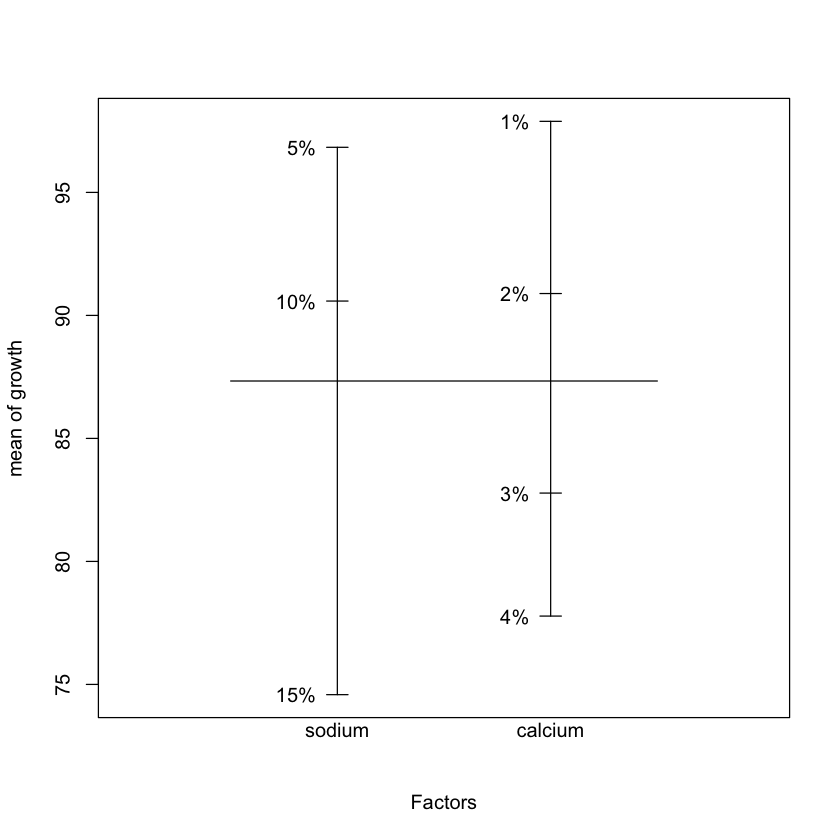

In [22]:
plot.design(growth ~ sodium + calcium)

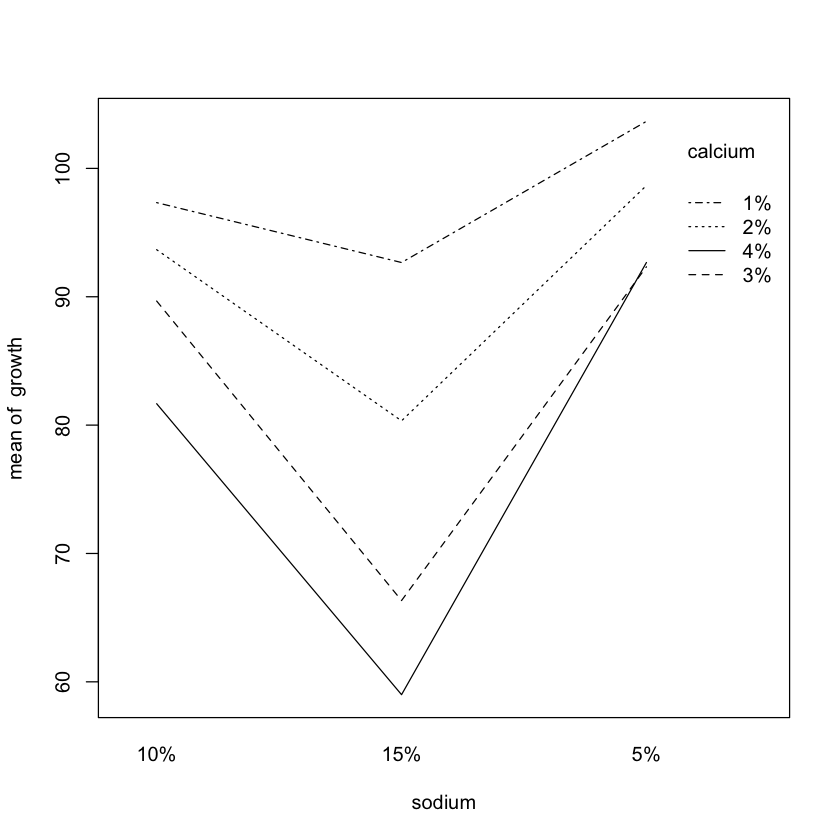

In [23]:
interaction.plot(sodium, calcium, growth)

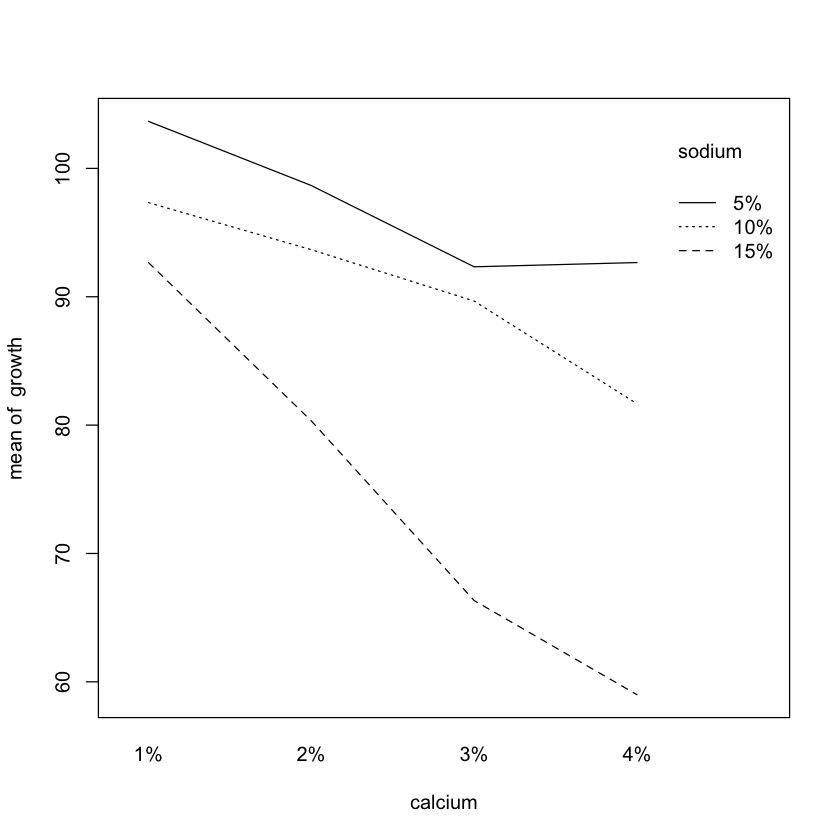

In [24]:
interaction.plot(calcium, sodium, growth)

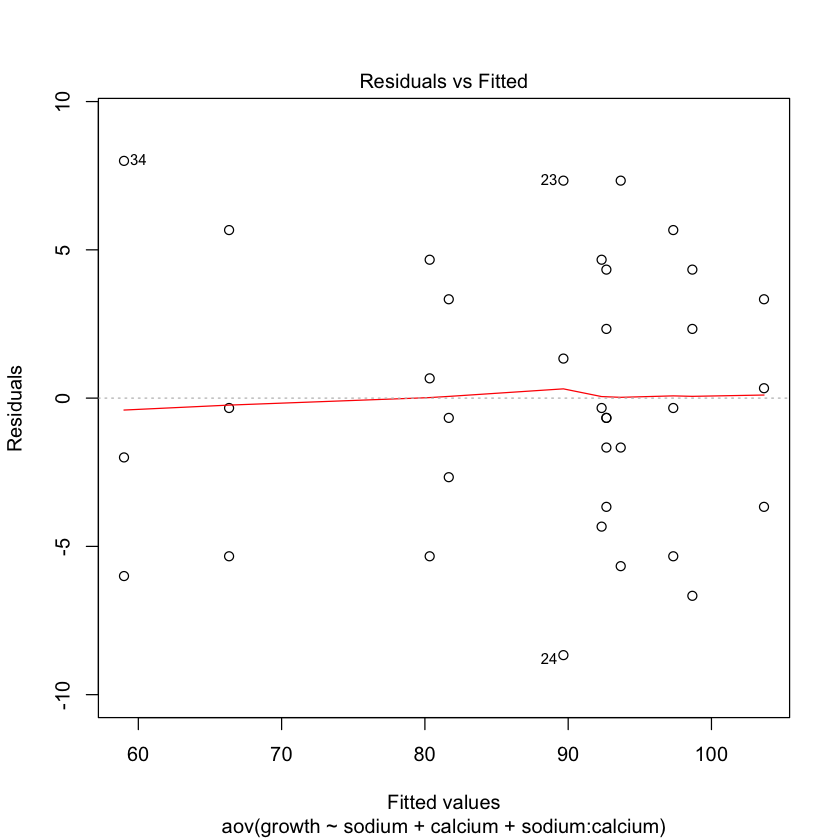

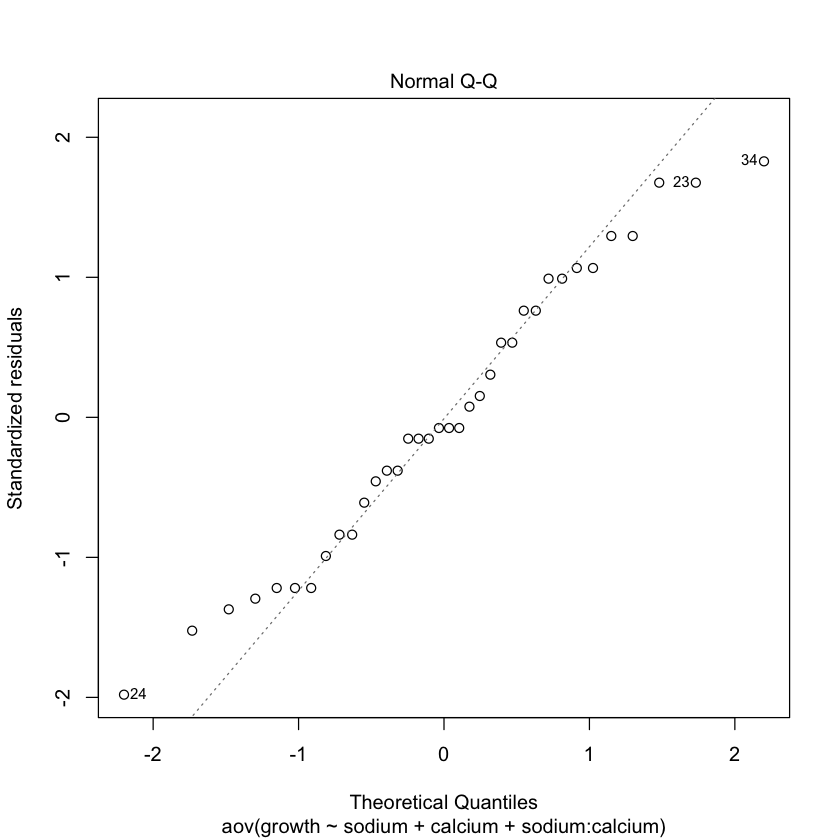

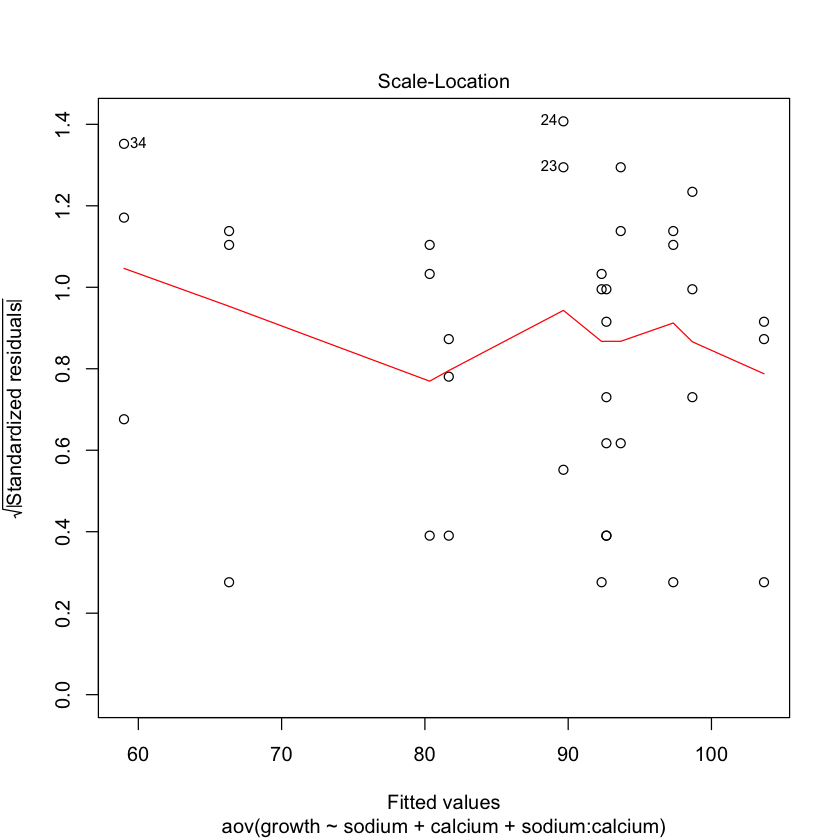

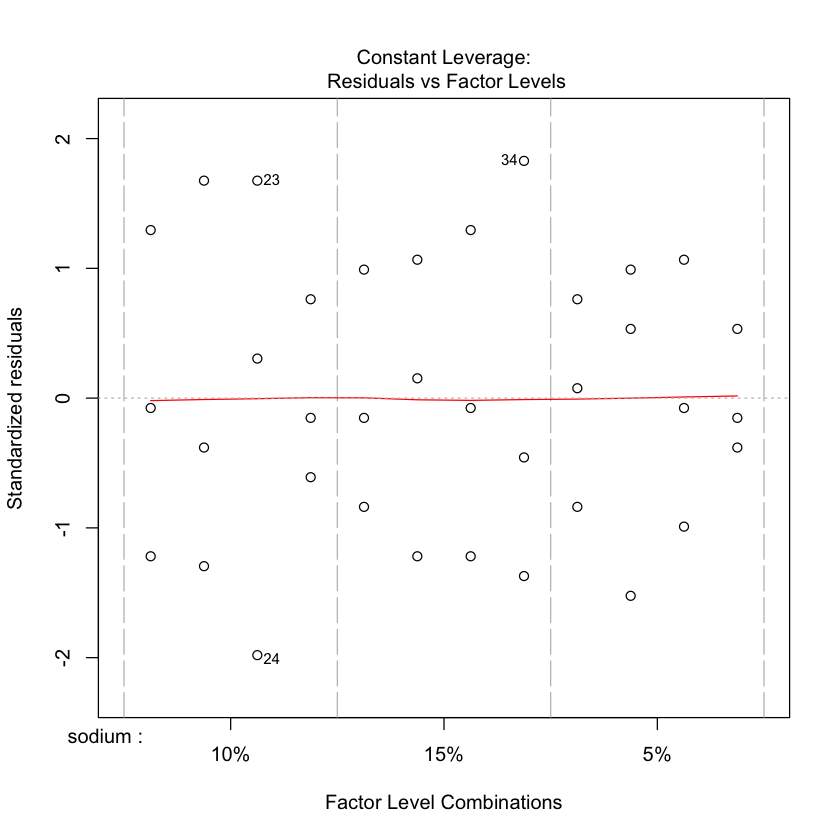

In [25]:
plot(tomato.int.aov)

## Now looking at the no-interaction model

In [26]:
tomato.no.int.aov <- aov(growth ~ sodium + calcium)

summary(tomato.no.int.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
sodium       2   3160  1580.2   38.04 5.93e-09 ***
calcium      3   2125   708.4   17.05 1.19e-06 ***
Residuals   30   1246    41.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Can reject both hypotheses at the 0.1% level of significance based on F-values.

In [27]:
tomato.no.int.residuals <- residuals(tomato.no.int.aov)

tomato.no.int.fitted <- fitted(tomato.no.int.aov)

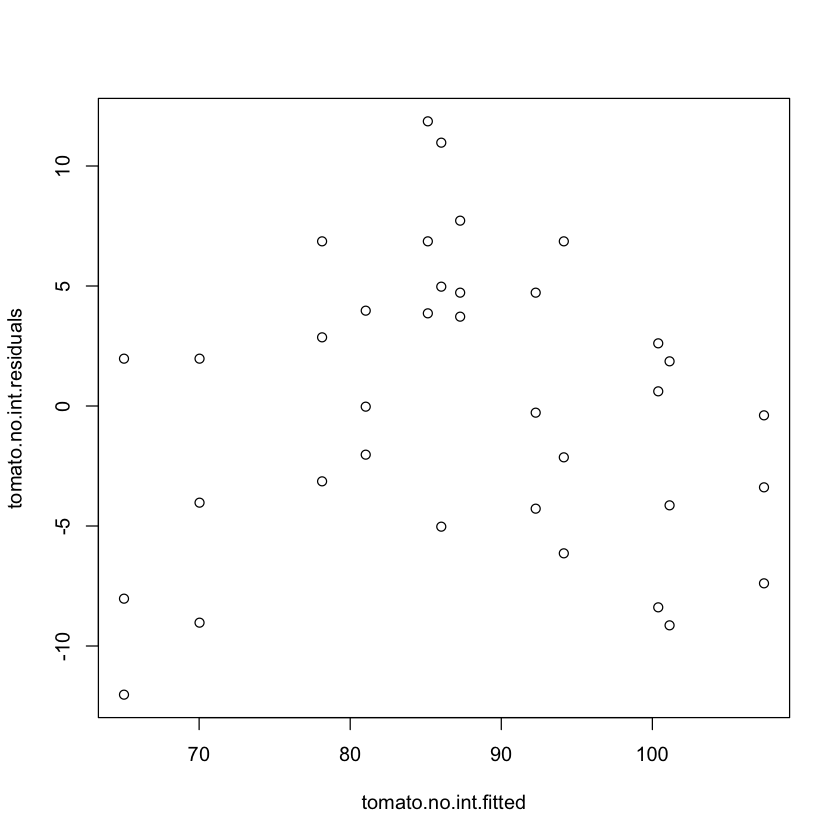

In [28]:
plot(tomato.no.int.fitted, tomato.no.int.residuals)

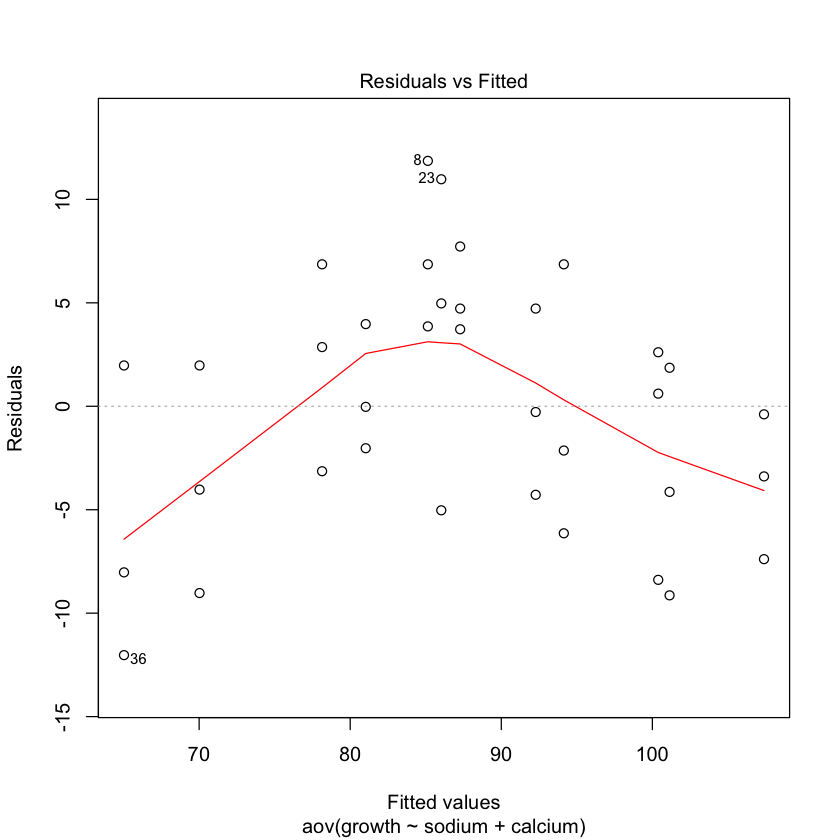

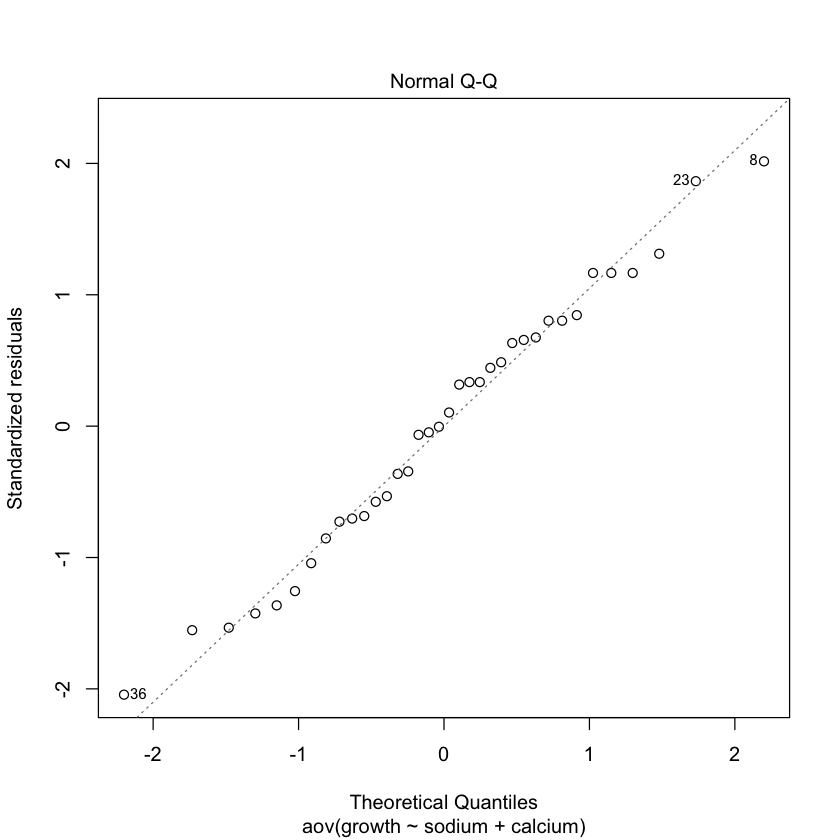

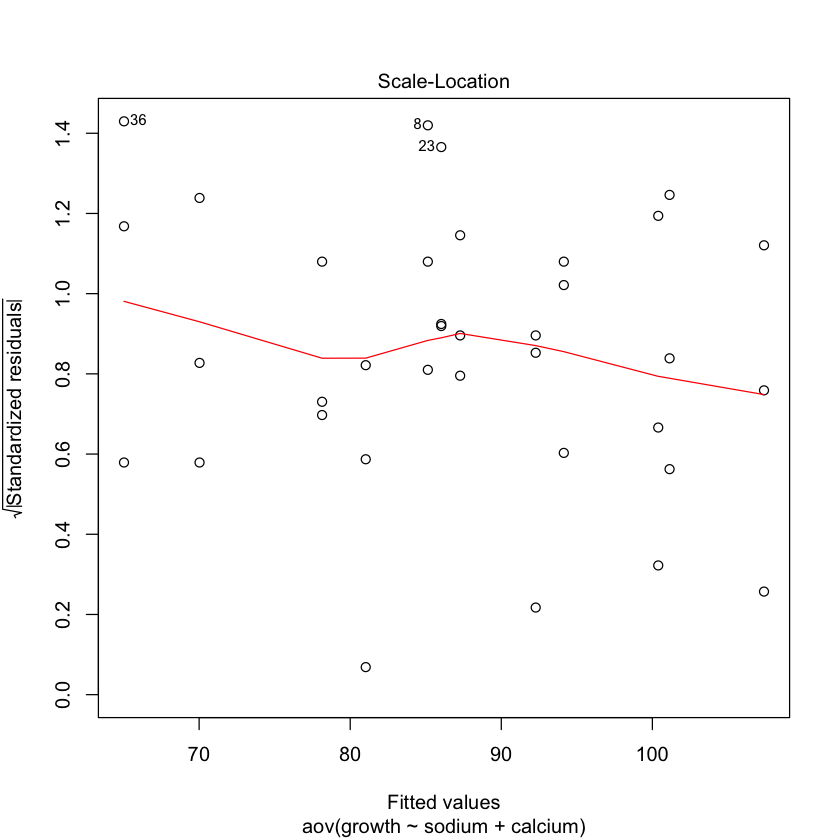

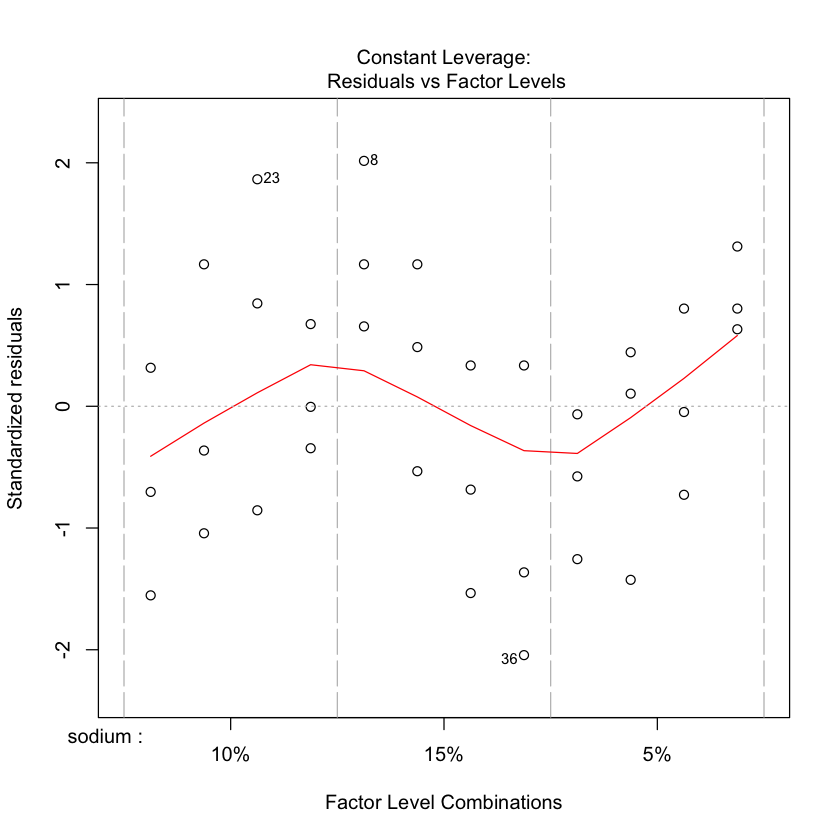

In [29]:
plot(tomato.no.int.aov)

## Comment on no-interaction model adequecy:

* We see trend in the plot of residuals against fitted values for the no-interaction model, which provides a tension  with our underlying model assumption that errors have zero mean, and have constant variance. The model fit with an interaction term (where that interaction component was significant at the 5% level) did not have this trend.

On the basis of model adequecy, we reject the no-interaction term model, and endorse the interaction term model.